In [2]:
import numpy as np
import numpy.linalg as la
import numpy.random as rnd
import matplotlib.pyplot as plt
import time as time #preguntar despues

In [3]:
rnd.seed(2025)
n= 200
m= 150
lambd = 0.8

D = np.diag(1+100*rnd.rand(n))
Q = D

Qr,R = la.qr(rnd.rand(n,n))
A = (Qr.T@D@Qr)[:,:m]
b = rnd.rand(n)

def f1(x):
  return la.norm(A@x-b)**2 + lambd*la.norm(x)**2

def grad_f1(x):
  #completar (es la misma del Obligatorio 1)
  return 2*A.T@A@x-2*A.T@b+2*lambd*x

xstar_f1 = la.inv(A.T@A+lambd*np.eye(m))@A.T@b

In [4]:
def rosenbrock(x, b=2):
    x1, x2 = x
    return (1 - x1)**2 + b * (x2 - x1**2)**2

def grad_rosenbrock(x, b=2):
    x1, x2 = x
    return np.array([
        2 * (x1 - 1) - 4 * b * x1 * (x2 - x1**2),
        2 * b * (x2 - x1**2)
    ])

xstar_rosenbrock = np.array([1,1])

In [5]:
from re import X
# Parte 2.a)
def gradient_descent(grad, x_init, xstar, alpha, tol=1e-5):
    xs = []
    es = []
    xs.append(x_init)
    it=0
    x = x_init.copy()
    es.append(la.norm(x - xstar))
    while la.norm(grad(x))>=tol:
      x=x-alpha*grad(x)
      xs.append(x.copy())
      it = it+1
      es.append(la.norm(xstar-x))
    return x, it, np.array(xs), np.array(es)

# Parte 2.b)
def nesterov_gradient_descent(grad, x_init, xstar, alpha, tol=1e-5):
    xs = []
    es = []
    xs.append(x_init)
    it=0
    p=0
    x=x_init.copy()
    x_anterior=x.copy()
    es.append(la.norm(x - xstar))
    while la.norm(grad(x))>=tol:
      it = it+1
      beta = (it-1)/(it+2)
      p=-grad((x+beta*(x-x_anterior)))+beta*p
      x_anterior=x.copy()
      x=x+alpha*p
      xs.append(x.copy())
      es.append(la.norm(xstar-x))
    return x, it, np.array(xs), np.array(es)




Text(0.5, 1.0, 'Curvas de nivel de Rosenbrock')

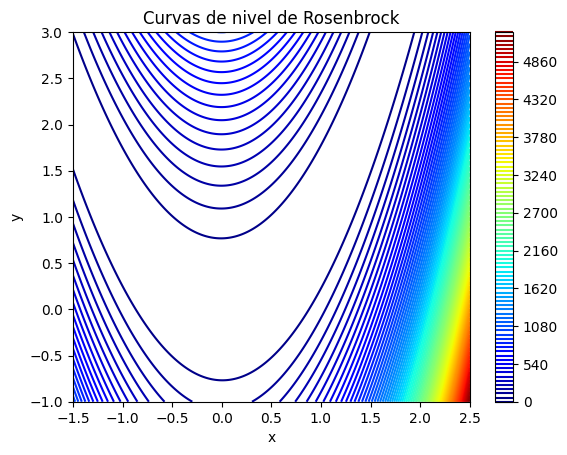

In [7]:
# Malla del plano
x = np.linspace(-1.5, 2.5, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)

# Evaluaxión de la función de Rosenbrock en cada punto de la malla
Z = (1 - X)**2 + 100 * (Y - X**2)**2
# Grafico de las curvas de nivel
plt.contour(X, Y, Z, levels=100, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de nivel de Rosenbrock')

Gradient Descent
x = [0.99998919 0.99997618]
f(x) = 1.2657758372911452e-10
||grad f(x)|| = 9.67636410371689e-06
Iteraciones = 288
Error final: 2.6162326528316174e-05
Tiempo de ejecución: 0.014171123504638672 segundos


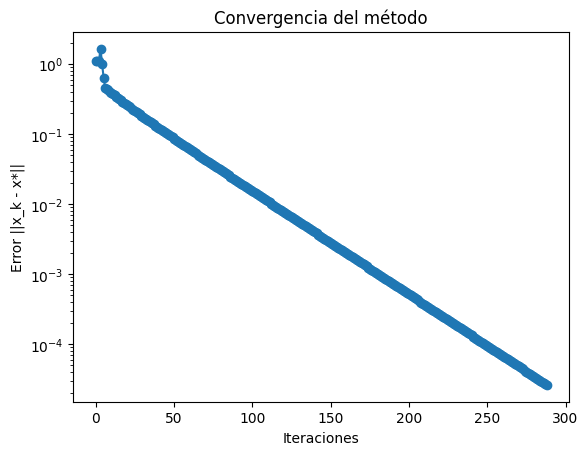

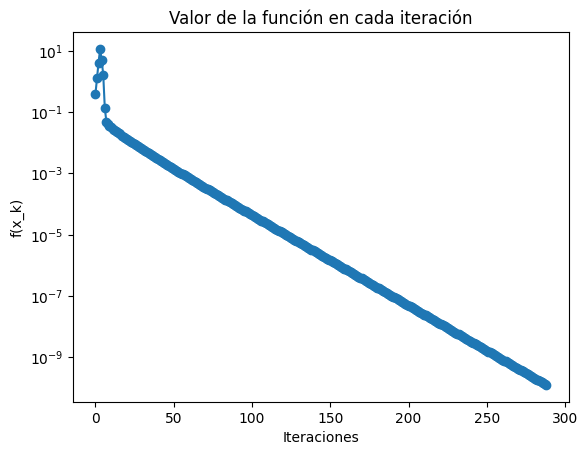

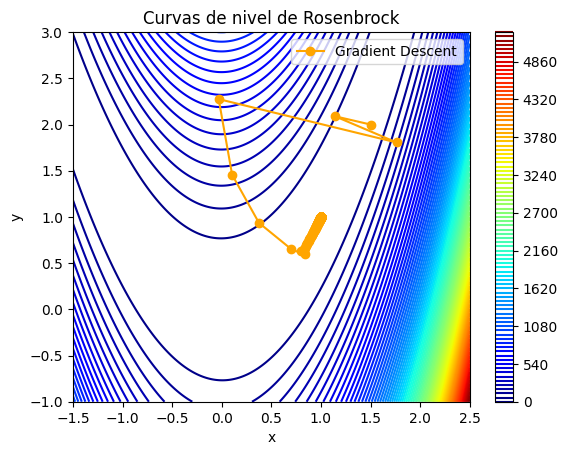

In [6]:
# Código inicial para comenzar la parte 2.c). Cambiar el valor del paso alpha.
#Prueba de Rosenbrock con Gradient Descent
x_init = np.array([1.5,2])
start = time.time()
x_gd, it_gd, xs_gd, e_gd = gradient_descent(grad_rosenbrock, x_init, xstar_rosenbrock, alpha=0.09)
end = time.time()
print('Gradient Descent')
print('x =', x_gd)
print('f(x) =', rosenbrock(x_gd))
print('||grad f(x)|| =', la.norm(grad_rosenbrock(x_gd)))
print('Iteraciones =', it_gd)
print('Error final:', e_gd[-1] )
print("Tiempo de ejecución:", end - start, "segundos")


# Graficar errores
iteraciones = list(range(0, it_gd+1))

plt.plot(iteraciones, e_gd, marker='o')
plt.yscale('log')
plt.xlabel('Iteraciones')
plt.ylabel('Error ||x_k - x*||')
plt.title('Convergencia del método')
plt.show()

valores_funcion = [rosenbrock(x) for x in xs_gd]

plt.plot(iteraciones, valores_funcion, marker='o')
plt.yscale('log')
plt.xlabel('Iteraciones')
plt.ylabel('f(x_k)')
plt.title('Valor de la función en cada iteración')
plt.show()

# Malla del plano
x = np.linspace(-1.5, 2.5, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)

# Evaluaxión de la función de Rosenbrock en cada punto de la malla
Z = (1 - X)**2 + 100 * (Y - X**2)**2

# Grafico de las curvas de nivel
plt.contour(X, Y, Z, levels=100, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de nivel de Rosenbrock')

# Gráfico de los puntos del recorrido
plt.plot(xs_gd[:, 0], xs_gd[:, 1], 'o-', label='Gradient Descent', color='orange')
plt.legend()
plt.show()


Nesterov
x = [1.0000032  1.00000707]
f(x) = 1.113577548730911e-11
||grad f(x)|| = 2.8704789421243956e-06
Iteraciones = 97
Error final: 7.759958075951678e-06
Tiempo de ejecución: 0.005029201507568359 segundos


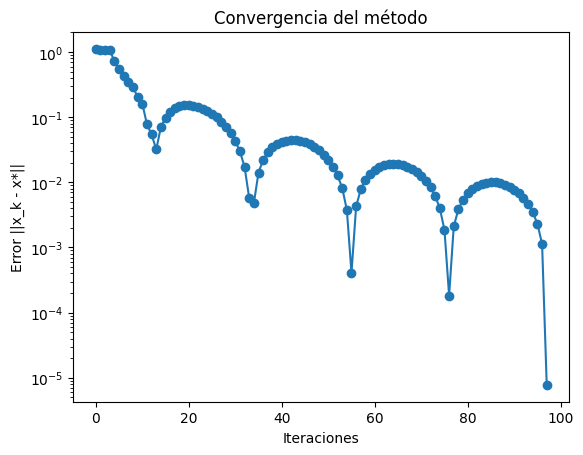

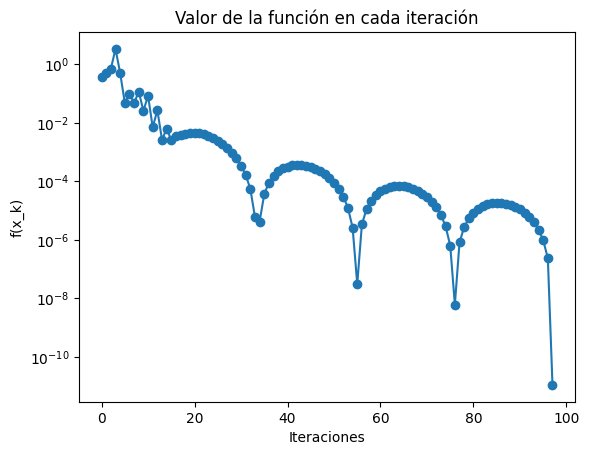

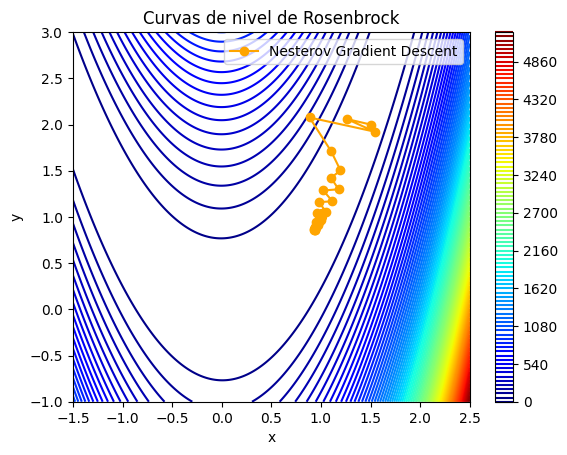

In [8]:
#Prueba de Rosenbrock con Nesterov
x_init = np.array([1.5,2])
start = time.time()
x_gd, it_gd, xs_gd, e_gd = nesterov_gradient_descent(grad_rosenbrock, x_init, xstar_rosenbrock, alpha=0.06)
end = time.time()
print('Nesterov')
print('x =', x_gd)
print('f(x) =', rosenbrock(x_gd))
print('||grad f(x)|| =', la.norm(grad_rosenbrock(x_gd)))
print('Iteraciones =', it_gd)
print('Error final:', e_gd[-1] )
print("Tiempo de ejecución:", end - start, "segundos")

# Graficar error en función de iterciones
iteraciones = list(range(0, it_gd+1))

plt.plot(iteraciones, e_gd, marker='o')
plt.yscale('log')  # Escala logarítmica en el eje y
plt.xlabel('Iteraciones')
plt.ylabel('Error ||x_k - x*||')
plt.title('Convergencia del método')
plt.show()

# Graficar valor funcional en función de iterciones

valores_funcion = [rosenbrock(x) for x in xs_gd]

plt.plot(iteraciones, valores_funcion, marker='o')
plt.yscale('log')
plt.xlabel('Iteraciones')
plt.ylabel('f(x_k)')
plt.title('Valor de la función en cada iteración')
plt.show()

# Malla del plano
x = np.linspace(-1.5, 2.5, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)

# Evaluaxión de la función de Rosenbrock en cada punto de la malla
Z = (1 - X)**2 + 100 * (Y - X**2)**2

# Grafico de las curvas de nivel
plt.contour(X, Y, Z, levels=100, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de nivel de Rosenbrock')

# Gráfico de los puntos del recorrido
plt.plot(xs_gd[:, 0], xs_gd[:, 1], 'o-', label='Nesterov Gradient Descent', color='orange')
plt.legend()
plt.show()

Gradient Descent
x = [-0.00351251  0.00101805  0.00373065  0.00134595  0.02159814  0.01063717
  0.01528717 -0.0010866   0.0078918   0.01030563  0.00607738  0.03913397
 -0.0220548   0.00901824  0.03205546  0.00836386  0.00431374  0.00194801
  0.01177561 -0.00513757 -0.0115032   0.01642677  0.01110146  0.02527623
  0.0099011   0.02534557 -0.000304    0.0152702   0.03861672  0.02020259
  0.00453565  0.01678699  0.01988651  0.01695623  0.02787553  0.01000653
  0.01306988 -0.01979636  0.01145762  0.01084211  0.0100165   0.02154925
  0.00685587 -0.02172752  0.00365703  0.01409345  0.01953669  0.01562212
 -0.0032998   0.02513352  0.00867085  0.02223883  0.00741865 -0.00291649
  0.01039737 -0.00218793  0.00303358  0.02453585  0.02581727 -0.01564499
  0.01160646  0.02861055  0.00985594 -0.00402298  0.03563439  0.02039784
  0.01261103  0.01146459  0.01210494  0.00071349  0.02636779  0.00382998
  0.00565302  0.00186008 -0.00956617  0.02194594  0.00845813  0.02047036
  0.01517712  0.02166139  0.01

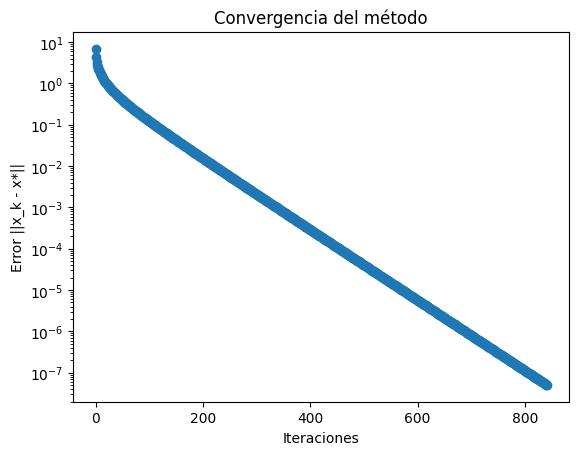

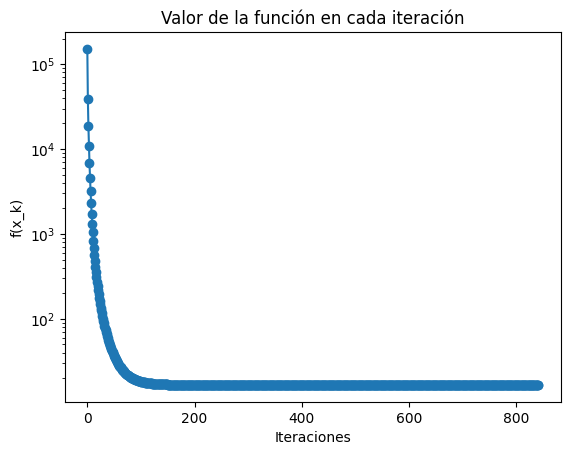

In [9]:
# Para la función ||Ax-b||^2 + lambd*||x||^2, comenzar desde un punto aleatorio
x_init = rnd.rand(m)

#Prueba de ||Ax-b||^2 + lambd*||x||^2 con Gradient Descent
start = time.time()
x_gd, it_gd, xs_gd, e_gd = gradient_descent(grad_f1, x_init, xstar_f1, alpha= 1e-4)
end = time.time()
print('Gradient Descent')
print('x =', x_gd)
print('f(x) =', f1(x_gd))
print('||grad f(x)|| =', la.norm(grad_f1(x_gd)))
print('Iteraciones =', it_gd)
print('Error final:', e_gd[-1] )
print("Tiempo de ejecución:", end - start, "segundos")

# Graficar
iteraciones = list(range(0, it_gd+1))  # [1, 2, 3, 4, 5]

plt.plot(iteraciones, e_gd, marker='o')
plt.yscale('log')  # Escala logarítmica en el eje y
plt.xlabel('Iteraciones')
plt.ylabel('Error ||x_k - x*||')
plt.title('Convergencia del método')
plt.show()

# Graficar valor funcional en función de iterciones

valores_funcion = [f1(x) for x in xs_gd]

plt.plot(iteraciones, valores_funcion, marker='o')
plt.yscale('log')
plt.xlabel('Iteraciones')
plt.ylabel('f(x_k)')
plt.title('Valor de la función en cada iteración')
plt.show()


Nesterov
x = [-0.00351252  0.00101805  0.00373064  0.00134594  0.02159814  0.01063717
  0.01528717 -0.0010866   0.00789181  0.01030563  0.00607737  0.03913397
 -0.02205481  0.00901824  0.03205546  0.00836386  0.00431373  0.001948
  0.01177561 -0.00513757 -0.01150319  0.01642678  0.01110146  0.02527624
  0.0099011   0.02534556 -0.000304    0.0152702   0.03861672  0.0202026
  0.00453565  0.016787    0.01988652  0.01695623  0.02787553  0.01000653
  0.01306988 -0.01979636  0.01145762  0.01084212  0.0100165   0.02154925
  0.00685587 -0.02172752  0.00365702  0.01409345  0.01953669  0.01562213
 -0.0032998   0.02513352  0.00867085  0.02223883  0.00741865 -0.0029165
  0.01039737 -0.00218793  0.00303358  0.02453585  0.02581727 -0.01564498
  0.01160646  0.02861056  0.00985594 -0.00402298  0.03563439  0.02039784
  0.01261103  0.01146459  0.01210494  0.00071349  0.0263678   0.00382998
  0.00565302  0.00186008 -0.00956617  0.02194594  0.00845813  0.02047036
  0.01517712  0.02166139  0.01152858  0.02

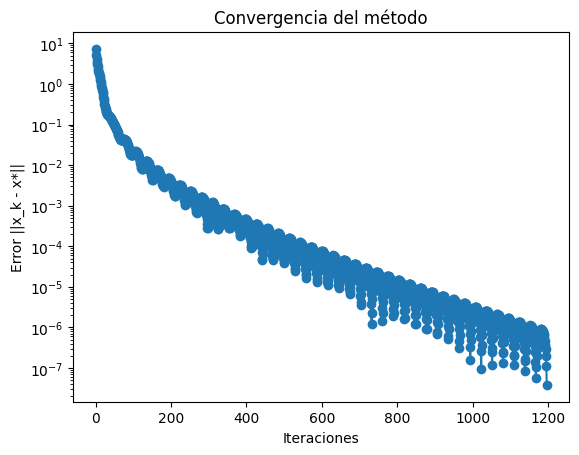

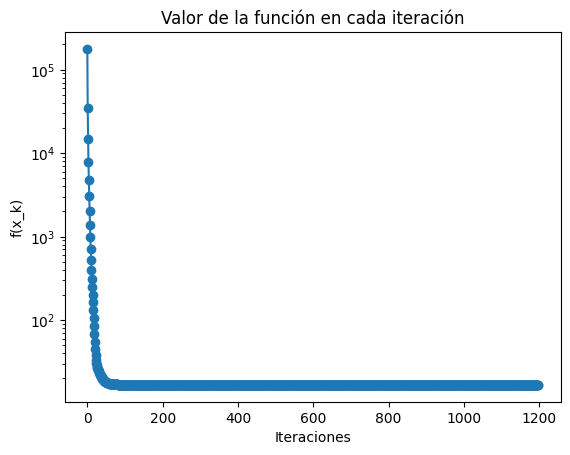

In [10]:
# Para la función ||Ax-b||^2 + lambd*||x||^2, comenzar desde un punto aleatorio
x_init = rnd.rand(m)

#Prueba de ||Ax-b||^2 + lambd*||x||^2 con Nesterov
start = time.time()
x_gd, it_gd, xs_gd, e_gd = nesterov_gradient_descent(grad_f1, x_init, xstar_f1, alpha=6e-5)
end = time.time()
print('Nesterov')
print('x =', x_gd)
print('f(x) =', f1(x_gd))
print('||grad f(x)|| =', la.norm(grad_f1(x_gd)))
print('Iteraciones =', it_gd)
print('Error final:', e_gd[-1] )
print("Tiempo de ejecución:", end - start, "segundos")

# Graficar
iteraciones = list(range(0, it_gd+1))  # [1, 2, 3, 4, 5]

plt.plot(iteraciones, e_gd, marker='o')
plt.yscale('log')  # Escala logarítmica en el eje y
plt.xlabel('Iteraciones')
plt.ylabel('Error ||x_k - x*||')
plt.title('Convergencia del método')
plt.show()

# Graficar valor funcional en función de iterciones

valores_funcion = [f1(x) for x in xs_gd]

plt.plot(iteraciones, valores_funcion, marker='o')
plt.yscale('log')
plt.xlabel('Iteraciones')
plt.ylabel('f(x_k)')
plt.title('Valor de la función en cada iteración')
plt.show()

Gradient Descent
x = [0.99998919 0.99997618]
f(x) = 1.2657758372911452e-10
||grad f(x)|| = 9.67636410371689e-06
Iteraciones = 288
Error final: 2.6162326528316174e-05
Tiempo de ejecución: 0.012733697891235352 segundos
Nesterov
x = [1.0000032  1.00000707]
f(x) = 1.113577548730911e-11
||grad f(x)|| = 2.8704789421243956e-06
Iteraciones = 97
Error final: 7.759958075951678e-06
Tiempo de ejecución: 0.005313396453857422 segundos


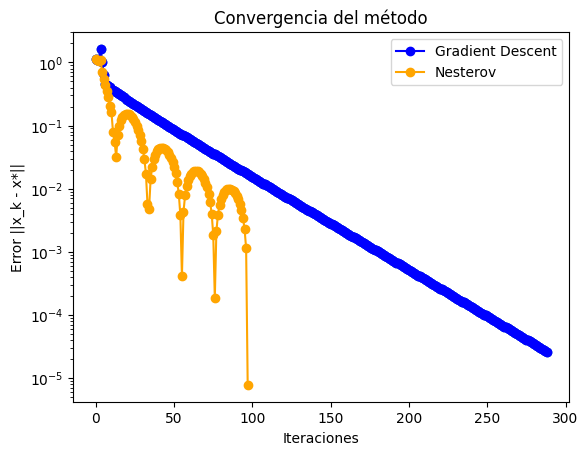

In [11]:
#Grafica rsenbrock

#Prueba de Rosenbrock con Gradient Descent
x_init = np.array([1.5,2])
start = time.time()
x_gd, it_gd, xs_gd, e_gd = gradient_descent(grad_rosenbrock, x_init, xstar_rosenbrock, alpha=9e-2)
end = time.time()
print('Gradient Descent')
print('x =', x_gd)
print('f(x) =', rosenbrock(x_gd))
print('||grad f(x)|| =', la.norm(grad_rosenbrock(x_gd)))
print('Iteraciones =', it_gd)
print('Error final:', e_gd[-1] )
print("Tiempo de ejecución:", end - start, "segundos")

#Prueba de Rosenbrock con Nesterov
x_init = np.array([1.5,2])
start = time.time()
x_gdn, it_gdn, xs_gdn, e_gdn = nesterov_gradient_descent(grad_rosenbrock, x_init, xstar_rosenbrock, alpha=6e-2)
end = time.time()
print('Nesterov')
print('x =', x_gdn)
print('f(x) =', rosenbrock(x_gdn))
print('||grad f(x)|| =', la.norm(grad_rosenbrock(x_gdn)))
print('Iteraciones =', it_gdn)
print('Error final:', e_gdn[-1] )
print("Tiempo de ejecución:", end - start, "segundos")


# Graficar
iteraciones = list(range(0, it_gd+1))

plt.plot(iteraciones, e_gd, marker='o')
plt.yscale('log')  # Escala logarítmica en el eje y
plt.xlabel('Iteraciones')
plt.ylabel('Error ||x_k - x*||')
plt.title('Convergencia del método')

iteracionesn = list(range(0, it_gdn+1))

# Graficar funciones
plt.plot(range(it_gd + 1), e_gd, marker='o', color='blue', label='Gradient Descent')
plt.plot(range(it_gdn + 1), e_gdn, marker='o', color='orange', label='Nesterov')
plt.yscale('log')
plt.xlabel('Iteraciones')
plt.ylabel('Error ||x_k - x*||')
plt.title('Convergencia del método')
plt.legend()
plt.show()


Gradient Descent
x = [-0.00351251  0.00101805  0.00373065  0.00134595  0.02159814  0.01063717
  0.01528717 -0.0010866   0.0078918   0.01030563  0.00607738  0.03913397
 -0.0220548   0.00901824  0.03205546  0.00836386  0.00431374  0.00194801
  0.01177561 -0.00513757 -0.0115032   0.01642677  0.01110146  0.02527623
  0.0099011   0.02534557 -0.000304    0.0152702   0.03861672  0.02020259
  0.00453565  0.01678699  0.01988651  0.01695623  0.02787553  0.01000653
  0.01306988 -0.01979636  0.01145762  0.01084211  0.0100165   0.02154925
  0.00685587 -0.02172752  0.00365703  0.01409345  0.01953669  0.01562212
 -0.0032998   0.02513352  0.00867085  0.02223883  0.00741865 -0.00291649
  0.01039737 -0.00218793  0.00303358  0.02453585  0.02581727 -0.01564499
  0.01160646  0.02861055  0.00985594 -0.00402298  0.03563439  0.02039784
  0.01261103  0.01146459  0.01210494  0.00071349  0.02636779  0.00382998
  0.00565302  0.00186008 -0.00956617  0.02194594  0.00845813  0.02047036
  0.01517712  0.02166139  0.01

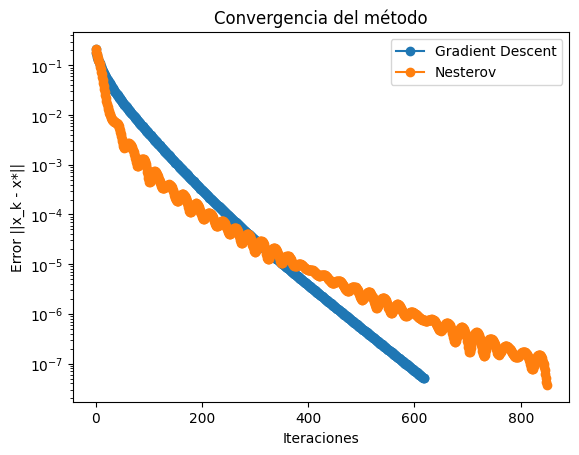

In [12]:
# Prueba de ||Ax - b||^2 + λ||x||^2 con Gradient Descent
x_init_gd = np.zeros_like(xstar_f1)
start = time.time()
x_res_gd, it_gd, xs_gd, e_gd = gradient_descent(grad_f1, x_init_gd, xstar_f1, alpha=1e-4)
end = time.time()
print('Gradient Descent')
print('x =', x_res_gd)
print('f(x) =', f1(x_res_gd))
print('||grad f(x)|| =', la.norm(grad_f1(x_res_gd)))
print('Iteraciones =', it_gd)
print('Error final:', e_gd[-1])
print("Tiempo de ejecución:", end - start, "segundos")

# Prueba de ||Ax - b||^2 + λ||x||^2 con Nesterov
x_init_gdn = np.zeros_like(xstar_f1)
start = time.time()
x_res_gdn, it_gdn, xs_gdn, e_gdn = nesterov_gradient_descent(grad_f1, x_init_gdn, xstar_f1, alpha=6e-5)
end = time.time()
print('Nesterov')
print('x =', x_res_gdn)
print('f(x) =', f1(x_res_gdn))
print('||grad f(x)|| =', la.norm(grad_f1(x_res_gdn)))
print('Iteraciones =', it_gdn)
print('Error final:', e_gdn[-1])
print("Tiempo de ejecución:", end - start, "segundos")

# Graficar funciones
plt.plot(range(it_gd + 1), e_gd, marker='o', label='Gradient Descent')
plt.plot(range(it_gdn + 1), e_gdn, marker='o', label='Nesterov')
plt.yscale('log')
plt.xlabel('Iteraciones')
plt.ylabel('Error ||x_k - x*||')
plt.title('Convergencia del método')
plt.legend()
plt.show()


Gradient Descent
x = [0.99998883 0.99997538]
f(x) = 1.3514550005801104e-10
||grad f(x)|| = 9.998496837525934e-06
Iteraciones = 17570
Error final: 2.7033277166696634e-05
Tiempo de ejecución: 0.5263564586639404 segundos


Text(0.5, 1.0, 'Convergencia del método')

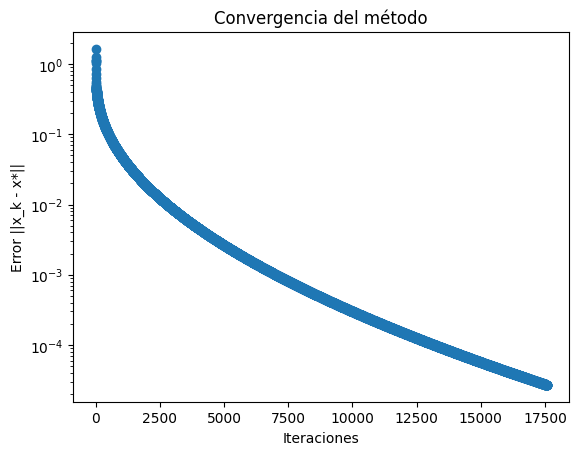

In [13]:
# Parte 2.d)
def gradient_descent_paso_decreciente(grad, x_init, xstar, tol=1e-5):
    xs = []
    es = []
    xs.append(x_init)
    it=0
    alpha=0.1
    x = x_init.copy()
    es.append(la.norm(x - xstar))
    while la.norm(grad(x))>=tol:
      x=x-alpha*grad(x)
      xs.append(x.copy())
      it = it+1
      es.append(la.norm(xstar-x))
      alpha = 0.1 / np.sqrt(it)
    return x, it, np.array(xs), np.array(es)

#Prueba de Rosenbrock con Gradient Descent
x_init = np.array([1.5,2])
start = time.time()
x_gd, it_gd, xs_gd, e_gd = gradient_descent_paso_decreciente(grad_rosenbrock, x_init, xstar_rosenbrock)
end = time.time()
print('Gradient Descent')
print('x =', x_gd)
print('f(x) =', rosenbrock(x_gd))
print('||grad f(x)|| =', la.norm(grad_rosenbrock(x_gd)))
print('Iteraciones =', it_gd)
print('Error final:', e_gd[-1] )
print("Tiempo de ejecución:", end - start, "segundos")

# Graficar
iteraciones = list(range(0, it_gd+1))

plt.plot(iteraciones, e_gd, marker='o')
plt.yscale('log')
plt.xlabel('Iteraciones')
plt.ylabel('Error ||x_k - x*||')
plt.title('Convergencia del método')

